## Seleção de atributos
### PCA no inicio sklearn/spark e ao final com as matrizes calculadas

In [1]:
from pyspark.sql import SparkSession
#Create PySpark SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/01 18:44:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
df = pd.read_csv(r'water_potability.csv')
df = df.dropna().reset_index(drop=True)
aux = df
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [5]:
y = df['Potability']
X = df.drop(columns='Potability')

X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


In [6]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2006    1
2007    1
2008    1
2009    1
2010    1
Name: Potability, Length: 2011, dtype: int64

In [7]:
#X = X.to_numpy()
#y = y.to_numpy()

In [8]:
from sklearn import preprocessing # para centralizar os dados e manter a proporção entre as dimensões

In [9]:
#scaled_X = X
#scaled_X = preprocessing.scale(scaled_X)
#scaled_X

In [10]:
chi2_selector = SelectKBest(chi2, k=4)
X_kbest = chi2_selector.fit_transform(X, y)
print(X_kbest)

print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)

[[2.20184174e+04 3.56886136e+02 3.63266516e+02 1.00341674e+02]
 [1.79789863e+04 3.10135738e+02 3.98410813e+02 3.19979927e+01]
 [2.87486877e+04 3.26678363e+02 2.80467916e+02 5.49178618e+01]
 ...
 [3.71888260e+04 2.58930600e+02 4.39893618e+02 4.15585007e+01]
 [2.61387802e+04 3.45700257e+02 4.15886955e+02 6.04199211e+01]
 [4.75809916e+04 3.59948574e+02 5.26424171e+02 6.66876948e+01]]
Original number of features: (2011, 9)
Reduced number of features: (2011, 4)


In [11]:
print(chi2_selector.get_feature_names_out())

['Solids' 'Sulfate' 'Conductivity' 'Trihalomethanes']


### Atributos atv 1 vs atv 2

Atributos selecionados na atividade 1 = ph, Hardness, Solids, Chloramines

Atributos selecionados na atividade 2 usando o metodo chi_quadrado = Solids, Sulfate, Conductivity,Trihalomethanes

## PCA

In [12]:
from sklearn.decomposition import PCA # faz o PCA
from sklearn import preprocessing # para centralizar os dados e manter a proporção entre as dimensões
import matplotlib.pyplot as plt # para gerar os graficos

In [13]:
scaled_data = preprocessing.scale(X)
scaled_data

array([[ 0.7824658 ,  0.56411376,  0.01168692, ...,  1.22703167,
         2.11165179,  0.84476056],
       [ 1.27546291, -0.45565257, -0.45583491, ..., -0.84215371,
        -2.14039865,  0.13503344],
       [-0.95483488, -0.23461412,  0.7906452 , ..., -1.79234008,
        -0.7144228 , -1.80736621],
       ...,
       [ 2.8004919 , -3.10036538,  1.76750279, ...,  0.54602107,
        -1.5455849 ,  0.51212515],
       [-0.64615977, -0.28531709,  0.48857575, ..., -0.6889287 ,
        -0.3721083 , -0.3845623 ],
       [-1.53717226, -0.07007504,  2.9702871 , ..., -0.139372  ,
         0.01784567,  0.59743748]])

In [14]:
pca = PCA()
pca.fit(scaled_data) # magic
pca_data = pca.transform(scaled_data)
pca_data

array([[-8.92774959e-01, -1.20348614e-01, -6.99172911e-01, ...,
        -1.57557876e+00, -6.02396195e-02, -8.85899226e-01],
       [-2.54283848e-01, -2.83668970e-01,  3.06222216e-01, ...,
        -3.90703430e-03,  1.29065033e+00,  1.11934353e+00],
       [ 1.05212008e+00,  5.21764663e-01, -1.49403418e+00, ...,
         7.62159357e-01,  2.52390343e-03, -1.57759265e-01],
       ...,
       [ 1.33775214e+00,  1.31480007e-02,  3.75629974e-01, ...,
         2.16150769e-01,  4.73642121e+00,  1.58440314e+00],
       [ 5.76311703e-01,  6.41426498e-01, -3.26272894e-01, ...,
         6.04658561e-01,  4.74022825e-02, -3.83446125e-01],
       [ 2.54130082e+00,  4.18424275e-01,  9.75558131e-01, ...,
         6.48537864e-01,  4.25496581e-02, -2.22071286e+00]])

In [15]:
print(type(pca))

<class 'sklearn.decomposition._pca.PCA'>


In [16]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)#quanta imformação cada pc tem em %, o ultimo é zero pq ne (não sei pq ele entra)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]# labels para o grafico
df = pd.DataFrame(pca_data, columns = labels)
df = pd.concat([df, y], axis = 1)
df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Potability
0,-0.892775,-0.120349,-0.699173,-1.041457,-0.634642,-1.683917,-1.575579,-0.060240,-0.885899,0
1,-0.254284,-0.283669,0.306222,1.742431,0.947493,0.912515,-0.003907,1.290650,1.119344,0
2,1.052120,0.521765,-1.494034,-0.319245,2.348544,1.454426,0.762159,0.002524,-0.157759,0
3,-1.806796,-1.101505,-1.306046,-1.275221,1.672606,0.222297,-0.777888,0.860414,-2.138292,0
4,-0.487809,-1.111868,0.642654,0.654000,-0.638950,1.192423,-0.914109,-0.023684,1.088139,0
...,...,...,...,...,...,...,...,...,...,...
2006,-0.461479,-0.752429,-0.561259,1.550124,0.090784,1.026308,-1.003589,0.389498,0.520581,1
2007,-0.130748,-0.189528,0.149927,1.321942,2.198891,-0.569759,0.911437,-0.144283,0.962709,1
2008,1.337752,0.013148,0.375630,0.536474,0.042330,-1.184213,0.216151,4.736421,1.584403,1
2009,0.576312,0.641426,-0.326273,0.072135,0.397207,0.479178,0.604659,0.047402,-0.383446,1


In [17]:
print(pca.explained_variance_)

In [46]:
print(1.20757355+1.17106004+1.04643829+1.01106139+1.00553877+0.97103026+0.95196501+0.87394765+0.76586266)

In [49]:
print(0.76586266/9.004477620000001)

0.08505353584298207


In [18]:
[0.76548182, 1.20697306, 1.17047771, 0.87351307, 1.04591793,
        0.95149163, 0.9705474 , 1.01055863, 1.00503875]

[0.76548182,
 1.20697306,
 1.17047771,
 0.87351307,
 1.04591793,
 0.95149163,
 0.9705474,
 1.01055863,
 1.00503875]

In [19]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)#quanta imformação cada pc tem em %, o ultimo é zero pq ne (não sei pq ele entra)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]# labels para o grafico
print(per_var)
print(labels)

[13.4 13.  11.6 11.2 11.2 10.8 10.6  9.7  8.5]
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']


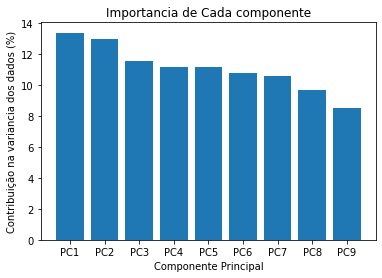

In [20]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)#grafico de barras
plt.ylabel('Contribuição na variancia dos dados (%)')
plt.xlabel('Componente Principal')
plt.title('Importancia de Cada componente')
plt.show()
# com PC1 e PC2 temos mais de 90% da variancia dos dados

In [21]:
tags = ['0','1']

In [22]:
df1 = spark.createDataFrame(df)

In blue the 0
In orange the 1


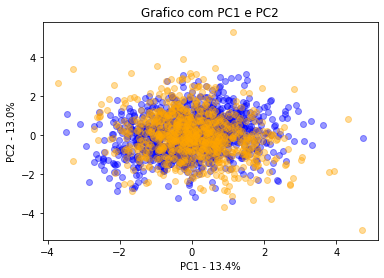

In [23]:
color = ['blue', 'orange', 'black', 'red']

for i in range(len(tags)):# cada iteração printa um a cor
    
    pc1 = np.array(df1.select('PC1', 'Potability').filter(df1.   Potability    == tags[i]).drop('Potability').collect())#df. (trocar 'coluna tags' pelo nome da coluna onde estão as classes)
    
    pc2 = np.array(df1.select('PC2', 'Potability').filter(df1.   Potability   == tags[i]).drop('Potability').collect())#df. (trocar 'coluna tags' pelo nome da coluna)
    
    print('In {} the {}'.format(color[i], tags[i]))
    
    plt.scatter(pc1, pc2, color = color[i], alpha=0.4) # color


plt.title('Grafico com PC1 e PC2')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()

In [24]:
df_s = pd.DataFrame(X, columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])
df_s.cov()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,2.475388,5.594047,-1.191314e+03,-0.061759,0.682289,1.794068,0.148439,0.462334,-0.044014
Hardness,5.594047,1065.048742,-1.502397e+04,-1.173283,-145.931394,30.898985,1.434925,-8.080239,-0.887028
Solids,-1191.314479,-15023.968352,7.468831e+07,-709.323403,-57962.923960,-3625.703522,-157.584560,-2176.917551,130.895988
Chloramines,-0.061759,-1.173283,-7.093234e+02,2.511654,0.408407,-3.617004,-0.125453,0.381933,0.016246
Sulfate,0.682289,-145.931394,-5.796292e+04,0.408407,1697.866203,-53.851912,3.668399,-15.466391,-0.319417
Conductivity,1.794068,30.898985,-3.625704e+03,-3.617004,-53.851912,6514.519345,4.199049,6.343406,0.786975
Organic_carbon,0.148439,1.434925,-1.575846e+02,-0.125453,3.668399,4.199049,11.055350,-0.302960,-0.040031
Trihalomethanes,0.462334,-8.080239,-2.176918e+03,0.381933,-15.466391,6.343406,-0.302960,258.473449,-0.257154
Turbidity,-0.044014,-0.887028,1.308960e+02,0.016246,-0.319417,0.786975,-0.040031,-0.257154,0.608940


In [25]:
scaled_data = pd.DataFrame(scaled_data, columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])
scaled_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.782466,0.564114,0.011687,0.583804,0.574378,-0.783962,1.227032,2.111652,0.844761
1,1.275463,-0.455653,-0.455835,-0.370947,-0.560480,-0.348429,-0.842154,-2.140399,0.135033
2,-0.954835,-0.234614,0.790645,0.259104,-0.158911,-1.810063,-1.792340,-0.714423,-1.807366
3,1.994902,1.596951,0.790764,0.239248,1.467140,-1.770608,-0.170876,1.132494,-1.662163
4,0.985323,0.226606,-0.954313,-1.622878,-0.726179,0.595858,-0.599824,-0.224135,0.553348
...,...,...,...,...,...,...,...,...,...
2006,1.210411,0.584770,-0.693978,-0.528284,-0.492625,-0.447578,-1.341281,-0.705001,0.825626
2007,-0.243774,0.347964,-0.540564,0.362137,-0.697038,-1.205321,0.559422,-2.334474,-0.675183
2008,2.800492,-3.100365,1.767503,1.343596,-1.803476,0.165656,0.546021,-1.545585,0.512125
2009,-0.646160,-0.285317,0.488576,0.387023,0.302843,-0.131852,-0.688929,-0.372108,-0.384562


In [26]:
df_s.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000


In [27]:
num = df_s.to_numpy()

In [28]:
corr = np.linalg.eig(df_s.corr())
corr

(array([0.76548182, 1.20697306, 1.17047771, 0.87351307, 1.04591793,
        0.95149163, 0.9705474 , 1.01055863, 1.00503875]),
 array([[-0.00901164,  0.47404071, -0.38863879, -0.73741317,  0.02855533,
          0.26977197, -0.02559969, -0.06350484,  0.0458843 ],
        [ 0.46044611,  0.21606914, -0.62587007,  0.47688068,  0.17244337,
         -0.02846038,  0.07436301, -0.28462248, -0.07133336],
        [ 0.57990796, -0.66225649, -0.16821895, -0.37314318, -0.11815196,
         -0.0030525 ,  0.05769798,  0.15566146, -0.12673165],
        [ 0.14369872,  0.06779952,  0.2597866 , -0.2331144 ,  0.59443501,
         -0.45328296,  0.50058809, -0.17142755,  0.1188623 ],
        [ 0.63754835,  0.45863379,  0.54146414,  0.01397518, -0.2424053 ,
          0.05988011, -0.15568366,  0.03075806, -0.04773887],
        [ 0.05136489,  0.01664511, -0.16084655, -0.04687941, -0.37054766,
         -0.49747192, -0.15423477, -0.03163354,  0.7479588 ],
        [-0.06717762,  0.16382524, -0.08868279,  0.0709527

In [29]:
corr_ord = pca.components_.T
corr_ord

array([[-0.47404071, -0.38863879, -0.02855533,  0.06350484, -0.0458843 ,
         0.02559969, -0.26977197,  0.73741317,  0.00901164],
       [-0.21606914, -0.62587007, -0.17244337,  0.28462248,  0.07133336,
        -0.07436301,  0.02846038, -0.47688068, -0.46044611],
       [ 0.66225649, -0.16821895,  0.11815196, -0.15566146,  0.12673165,
        -0.05769798,  0.0030525 ,  0.37314318, -0.57990796],
       [-0.06779952,  0.2597866 , -0.59443501,  0.17142755, -0.1188623 ,
        -0.50058809,  0.45328296,  0.2331144 , -0.14369872],
       [-0.45863379,  0.54146414,  0.2424053 , -0.03075806,  0.04773887,
         0.15568366, -0.05988011, -0.01397518, -0.63754835],
       [-0.01664511, -0.16084655,  0.37054766,  0.03163354, -0.7479588 ,
         0.15423477,  0.49747192,  0.04687941, -0.05136489],
       [-0.16382524, -0.08868279,  0.51549467, -0.25103235,  0.10830838,
        -0.78419574,  0.01743162, -0.07095278,  0.06717762],
       [-0.04620069, -0.04434396, -0.36757885, -0.69650358, -0

In [30]:
corr_ord = pca.components_
corr_ord

array([[-0.47404071, -0.21606914,  0.66225649, -0.06779952, -0.45863379,
        -0.01664511, -0.16382524, -0.04620069,  0.21406511],
       [-0.38863879, -0.62587007, -0.16821895,  0.2597866 ,  0.54146414,
        -0.16084655, -0.08868279, -0.04434396,  0.18048214],
       [-0.02855533, -0.17244337,  0.11815196, -0.59443501,  0.2424053 ,
         0.37054766,  0.51549467, -0.36757885,  0.07225053],
       [ 0.06350484,  0.28462248, -0.15566146,  0.17142755, -0.03075806,
         0.03163354, -0.25103235, -0.69650358,  0.55790507],
       [-0.0458843 ,  0.07133336,  0.12673165, -0.1188623 ,  0.04773887,
        -0.7479588 ,  0.10830838, -0.45206732, -0.42988381],
       [ 0.02559969, -0.07436301, -0.05769798, -0.50058809,  0.15568366,
         0.15423477, -0.78419574, -0.07045015, -0.26822632],
       [-0.26977197,  0.02846038,  0.0030525 ,  0.45328296, -0.05988011,
         0.49747192,  0.01743162, -0.35339691, -0.58709553],
       [ 0.73741317, -0.47688068,  0.37314318,  0.2331144 , -0

In [31]:
for i in range(len(corr_ord)):
    print(corr_ord[i])

[-0.47404071 -0.21606914  0.66225649 -0.06779952 -0.45863379 -0.01664511
 -0.16382524 -0.04620069  0.21406511]
[-0.38863879 -0.62587007 -0.16821895  0.2597866   0.54146414 -0.16084655
 -0.08868279 -0.04434396  0.18048214]
[-0.02855533 -0.17244337  0.11815196 -0.59443501  0.2424053   0.37054766
  0.51549467 -0.36757885  0.07225053]
[ 0.06350484  0.28462248 -0.15566146  0.17142755 -0.03075806  0.03163354
 -0.25103235 -0.69650358  0.55790507]
[-0.0458843   0.07133336  0.12673165 -0.1188623   0.04773887 -0.7479588
  0.10830838 -0.45206732 -0.42988381]
[ 0.02559969 -0.07436301 -0.05769798 -0.50058809  0.15568366  0.15423477
 -0.78419574 -0.07045015 -0.26822632]
[-0.26977197  0.02846038  0.0030525   0.45328296 -0.05988011  0.49747192
  0.01743162 -0.35339691 -0.58709553]
[ 0.73741317 -0.47688068  0.37314318  0.2331144  -0.01397518  0.04687941
 -0.07095278 -0.16076458 -0.04422602]
[ 0.00901164 -0.46044611 -0.57990796 -0.14369872 -0.63754835 -0.05136489
  0.06717762 -0.12491976 -0.04173214]


In [32]:
#linha 0
# 1x9 9x9 = 1x9
#[ 0.7824658 ,  0.56411376,  0.01168692, ...,  1.22703167,2.11165179,  0.84476056]

In [33]:
vec = [8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771]

vec = [0.782466,0.564114,0.011687,0.583804,0.574378,-0.783962,1.227032,2.111652,0.844761]

vec = np.array(vec)

print(np.dot(vec, corr_ord))

[ 0.63391306 -1.6197615   0.75363889  1.43785962 -0.80473297  0.03452899
  0.28655624 -1.55514577 -0.28980244]


In [34]:
#1x9 9x9
#amostra pela matrix

In [35]:
print(pca.explained_variance_)

[1.20757355 1.17106004 1.04643829 1.01106139 1.00553877 0.97103026
 0.95196501 0.87394765 0.76586266]


In [36]:
[0.76548182, 1.20697306, 1.17047771, 0.87351307, 1.04591793,
        0.95149163, 0.9705474 , 1.01055863, 1.00503875]

[0.76548182,
 1.20697306,
 1.17047771,
 0.87351307,
 1.04591793,
 0.95149163,
 0.9705474,
 1.01055863,
 1.00503875]

In [37]:
[-0.47404071, -0.38863879, -0.02855533,  0.06350484, -0.0458843 ,
         0.02559969, -0.26977197,  0.73741317,  0.00901164],

([-0.47404071,
  -0.38863879,
  -0.02855533,
  0.06350484,
  -0.0458843,
  0.02559969,
  -0.26977197,
  0.73741317,
  0.00901164],)

In [38]:
#do modelo treinado
matrix = pca.get_covariance()
matrix

array([[ 1.00049751,  0.10900232, -0.08765858, -0.02478081,  0.01052958,
         0.01413488,  0.02838934,  0.01828697, -0.03586683],
       [ 0.10900232,  1.00049751, -0.05329539, -0.02269626, -0.10857461,
         0.01173638,  0.01323044, -0.01540804, -0.03484827],
       [-0.08765858, -0.05329539,  1.00049751, -0.05181483, -0.16285018,
        -0.00520045, -0.00548677, -0.01567558,  0.01941908],
       [-0.02478081, -0.02269626, -0.05181483,  1.00049751,  0.00625717,
        -0.02829072, -0.02381947,  0.01499739,  0.01314311],
       [ 0.01052958, -0.10857461, -0.16285018,  0.00625717,  1.00049751,
        -0.01620034,  0.02678888, -0.02335852, -0.00993882],
       [ 0.01413488,  0.01173638, -0.00520045, -0.02829072, -0.01620034,
         1.00049751,  0.01565451,  0.00489091,  0.01250111],
       [ 0.02838934,  0.01323044, -0.00548677, -0.02381947,  0.02678888,
         0.01565451,  1.00049751, -0.00567031, -0.01543597],
       [ 0.01828697, -0.01540804, -0.01567558,  0.01499739, -0

In [39]:
m1 = np.linalg.eig(matrix)
m1

(array([0.76586266, 1.20757355, 1.17106004, 0.87394765, 1.04643829,
        0.95196501, 0.97103026, 1.01106139, 1.00553877]),
 array([[-0.00901164,  0.47404071, -0.38863879, -0.73741317,  0.02855533,
          0.26977197, -0.02559969, -0.06350484,  0.0458843 ],
        [ 0.46044611,  0.21606914, -0.62587007,  0.47688068,  0.17244337,
         -0.02846038,  0.07436301, -0.28462248, -0.07133336],
        [ 0.57990796, -0.66225649, -0.16821895, -0.37314318, -0.11815196,
         -0.0030525 ,  0.05769798,  0.15566146, -0.12673165],
        [ 0.14369872,  0.06779952,  0.2597866 , -0.2331144 ,  0.59443501,
         -0.45328296,  0.50058809, -0.17142755,  0.1188623 ],
        [ 0.63754835,  0.45863379,  0.54146414,  0.01397518, -0.2424053 ,
          0.05988011, -0.15568366,  0.03075806, -0.04773887],
        [ 0.05136489,  0.01664511, -0.16084655, -0.04687941, -0.37054766,
         -0.49747192, -0.15423477, -0.03163354,  0.7479588 ],
        [-0.06717762,  0.16382524, -0.08868279,  0.0709527

In [40]:
m2 = pca.components_.T
m2

array([[-0.47404071, -0.38863879, -0.02855533,  0.06350484, -0.0458843 ,
         0.02559969, -0.26977197,  0.73741317,  0.00901164],
       [-0.21606914, -0.62587007, -0.17244337,  0.28462248,  0.07133336,
        -0.07436301,  0.02846038, -0.47688068, -0.46044611],
       [ 0.66225649, -0.16821895,  0.11815196, -0.15566146,  0.12673165,
        -0.05769798,  0.0030525 ,  0.37314318, -0.57990796],
       [-0.06779952,  0.2597866 , -0.59443501,  0.17142755, -0.1188623 ,
        -0.50058809,  0.45328296,  0.2331144 , -0.14369872],
       [-0.45863379,  0.54146414,  0.2424053 , -0.03075806,  0.04773887,
         0.15568366, -0.05988011, -0.01397518, -0.63754835],
       [-0.01664511, -0.16084655,  0.37054766,  0.03163354, -0.7479588 ,
         0.15423477,  0.49747192,  0.04687941, -0.05136489],
       [-0.16382524, -0.08868279,  0.51549467, -0.25103235,  0.10830838,
        -0.78419574,  0.01743162, -0.07095278,  0.06717762],
       [-0.04620069, -0.04434396, -0.36757885, -0.69650358, -0

In [41]:
aux.cov()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,2.475388,5.594047,-1.191314e+03,-0.061759,0.682289,1.794068,0.148439,0.462334,-0.044014,0.011217
Hardness,5.594047,1065.048742,-1.502397e+04,-1.173283,-145.931394,30.898985,1.434925,-8.080239,-0.887028,-0.024100
Solids,-1191.314479,-15023.968352,7.468831e+07,-709.323403,-57962.923960,-3625.703522,-157.584560,-2176.917551,130.895988,172.481345
Chloramines,-0.061759,-1.173283,-7.093234e+02,2.511654,0.408407,-3.617004,-0.125453,0.381933,0.016246,0.016162
Sulfate,0.682289,-145.931394,-5.796292e+04,0.408407,1697.866203,-53.851912,3.668399,-15.466391,-0.319417,-0.309407
Conductivity,1.794068,30.898985,-3.625704e+03,-3.617004,-53.851912,6514.519345,4.199049,6.343406,0.786975,-0.613691
Organic_carbon,0.148439,1.434925,-1.575846e+02,-0.125453,3.668399,4.199049,11.055350,-0.302960,-0.040031,-0.025397
Trihalomethanes,0.462334,-8.080239,-2.176918e+03,0.381933,-15.466391,6.343406,-0.302960,258.473449,-0.257154,0.072924
Turbidity,-0.044014,-0.887028,1.308960e+02,0.016246,-0.319417,0.786975,-0.040031,-0.257154,0.608940,0.008685
Potability,0.011217,-0.024100,1.724813e+02,0.016162,-0.309407,-0.613691,-0.025397,0.072924,0.008685,0.240765


In [42]:
print(m1[1][0])
print()
print(m2[0])

[-0.00901164  0.47404071 -0.38863879 -0.73741317  0.02855533  0.26977197
 -0.02559969 -0.06350484  0.0458843 ]

[-0.47404071 -0.38863879 -0.02855533  0.06350484 -0.0458843   0.02559969
 -0.26977197  0.73741317  0.00901164]


In [43]:
v = [1.2130534 , 1.1713104 , 0.76433377, 0.86688889, 1.05960389, 0.94556681, 0.96821338, 0.99651098, 1.01360255, 1.00589105]

In [44]:
v.sort()
print(v)

[0.76433377, 0.86688889, 0.94556681, 0.96821338, 0.99651098, 1.00589105, 1.01360255, 1.05960389, 1.1713104, 1.2130534]


In [45]:
print(len(v))

10


In [ ]:
sns.relplot(x = df['ph'], y= df['Conductivity'], hue= df['Potability'], col = df['Potability'], data=df)